In [1]:
import pandas as pd
import pickle
import time
import os
import re
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '/media/andrii/earth/Katia/CS_MasterThesis/Red_links_Project_for_Wiki_draft/py')
import functions

In [3]:
PATH_TO_DATA_RL = '/media/andrii/earth/Katia/CS_MasterThesis/data/ukwiki/uk_red_links/'

In [4]:
candidate_pairs = pd.read_csv(PATH_TO_DATA_RL+'red_links_uk_with_features.csv', sep='^')

In [5]:
candidate_pairs.head()

,pair_unique_id,red_link_name,candidate,true_label,BN_results,jaccard_score,levenstein_score,concur_score
0,0,Pachetra sagittigera,Phytometra viridaria,False,0,0.081,0.650,0.03060
1,1,Pachetra sagittigera,Conistra rubiginea,False,0,0.076,0.600,0.03053
2,2,Pachetra sagittigera,Tholera decimalis,False,0,0.068,0.750,0.03026
3,3,Pachetra sagittigera,Pachetra sagittigera,True,0,0.066,0.000,0.03271
4,4,Pachetra sagittigera,Hoplodrina octogenaria,False,0,0.066,0.727,0.03297


In [25]:
candidate_pairs.head(50)

,pair_unique_id,red_link_name,candidate,true_label,BN_results,jaccard_score,levenstein_score,concur_score
0,0,Pachetra sagittigera,Phytometra viridaria,False,0,0.081,0.650,0.03060
1,1,Pachetra sagittigera,Conistra rubiginea,False,0,0.076,0.600,0.03053
2,2,Pachetra sagittigera,Tholera decimalis,False,0,0.068,0.750,0.03026
3,3,Pachetra sagittigera,Pachetra sagittigera,True,0,0.066,0.000,0.03271
4,4,Pachetra sagittigera,Hoplodrina octogenaria,False,0,0.066,0.727,0.03297
5,5,Pachetra sagittigera,Tiliacea aurago,False,0,0.065,0.800,0.03155
6,6,Pachetra sagittigera,Apamea illyria,False,0,0.063,0.750,0.03033
7,7,Pachetra sagittigera,Apamea lithoxylaea,False,0,0.063,0.800,0.03323
8,8,Pachetra sagittigera,Apamea lateritia,False,0,0.063,0.700,0.02899
9,9,Pachetra sagittigera,Actinotia polyodon,False,0,0.062,0.900,0.02929


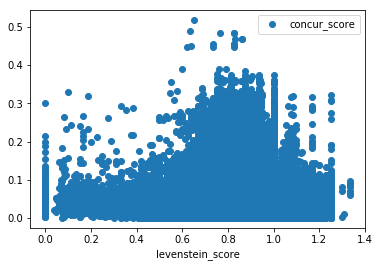

In [6]:
candidate_pairs.plot(x='levenstein_score', y='concur_score', style='o')

In [7]:
df = candidate_pairs[['levenstein_score', 'concur_score', 'true_label']]

In [8]:
df_true = df[df['true_label']==True]

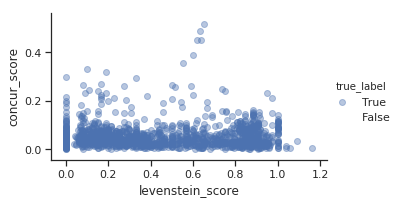

In [9]:
import seaborn
seaborn.set(style='ticks')

true_values = [True, False]

fg = seaborn.FacetGrid(data=df_true, hue='true_label', hue_order=true_values, aspect=1.61)
fg.map(plt.scatter, 'levenstein_score', 'concur_score', alpha=.4).add_legend()

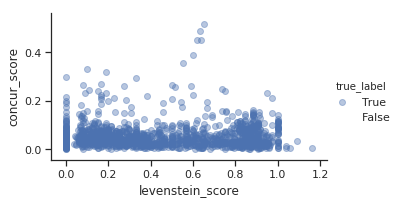

In [10]:
import seaborn
seaborn.set(style='ticks')

true_values = [True, False]

fg = seaborn.FacetGrid(data=df_true, hue='true_label', hue_order=true_values, aspect=1.61)
fg.map(plt.scatter, 'levenstein_score', 'concur_score', alpha=.4).add_legend()

In [11]:
df = candidate_pairs[['concur_score', 'jaccard_score', 'true_label']]

import seaborn
seaborn.set(style='ticks')

true_values = [True, False]

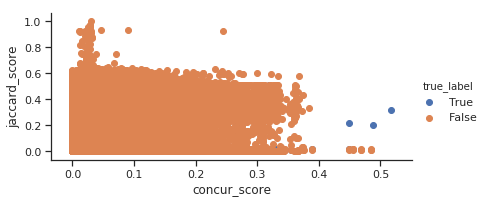

In [12]:
fg = seaborn.FacetGrid(data=df, hue='true_label', hue_order=true_values, aspect=2)
fg.map(plt.scatter, 'concur_score', 'jaccard_score').add_legend()

## Run Logistic regression

In [13]:
# Run Once!
#functions.train_test_split(PATH_TO_DATA_RL, candidate_pairs)

In [35]:
train_set = pd.read_csv(PATH_TO_DATA_RL+'train_set.csv', sep='^')

In [36]:
train_set.head()

,pair_unique_id,red_link_name,candidate,true_label,BN_results,jaccard_score,levenstein_score,concur_score
0,0,Pachetra sagittigera,Phytometra viridaria,False,0,0.081,0.650,0.03060
1,1,Pachetra sagittigera,Conistra rubiginea,False,0,0.076,0.600,0.03053
2,2,Pachetra sagittigera,Tholera decimalis,False,0,0.068,0.750,0.03026
3,3,Pachetra sagittigera,Pachetra sagittigera,True,0,0.066,0.000,0.03271
4,4,Pachetra sagittigera,Hoplodrina octogenaria,False,0,0.066,0.727,0.03297


In [37]:
test_set = pd.read_csv(PATH_TO_DATA_RL+'test_set.csv', sep='^')

In [17]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [39]:
X_train_df = train_set[['BN_results', 'jaccard_score', 'levenstein_score', 'concur_score']]

X_train = X_train_df.values

In [19]:
y_train = train_set['true_label']

In [20]:
X_test = test_set[['BN_results', 'jaccard_score', 'levenstein_score', 'concur_score']]

X_test = X_test.values

In [21]:
y_test = test_set['true_label']

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/andrii/apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    590915
        True       0.98      0.45      0.62       394

   micro avg       1.00      1.00      1.00    591309
   macro avg       0.99      0.73      0.81    591309
weighted avg       1.00      1.00      1.00    591309



In [26]:
print(logreg.coef_)

[[ 10.78395409  -0.36286886 -13.05411743  13.23091561]]


In [27]:
from sklearn.feature_selection import RFE

In [29]:
rfe = RFE(logreg, 1)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/home/andrii/apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andrii/apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andrii/apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andrii/apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False False  True False]
[3 4 1 2]


In [ ]:
#Make difference in feature dependance
y = (3 + x1 + 2*x2 + 5*x3 + 0.2*np.random.randn()) > 0

X = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})

#Scale your data
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, y)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [42]:
x1 = np.random.randn(100)
x2 = np.random.randn(100)
x3 = np.random.randn(100)
y = (3 + x1 + 2*x2 + 5*x3 + 0.2*np.random.randn()) > 0
y

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False])

In [31]:
from sklearn.preprocessing import StandardScaler

In [40]:
# try
scaler = StandardScaler()
scaler.fit(X_train_df) 
X_scaled = pd.DataFrame(scaler.transform(X_train_df),columns = X_train_df.columns)

/home/andrii/apps/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/andrii/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [44]:
clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, y_train)

/home/andrii/apps/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

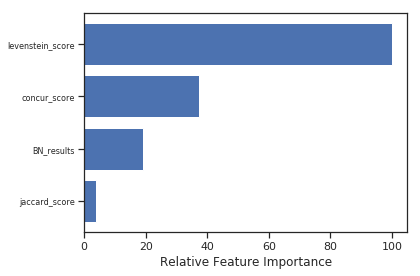

In [46]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train_df.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()